# HEART DISEASE PREDICTION
---
### Supervised Machine Learning: Classification

Author: Federico Gorrini, Ph.D.

Data and Machine Learning models:
- Supervised data: This type of data always includes one or more target variables.
- Unsupervised data: This type of data does not include any target variables.

Tackling a supervised problem is generally more straightforward compared to an unsupervised one. A supervised problem involves predicting a specific value. For instance, predicting house prices based on historical data and features such as proximity to hospitals, schools, supermarkets, and public transport is a supervised problem. Similarly, if we have images of cats and dogs, and we know which images correspond to each animal, creating a model to predict whether a given image is of a cat or a dog is also a supervised problem.

In this dataset, we are dealing with a supervised machine learning problem aimed at predicting heart failure.

### Importing libraries

In [246]:
import os
import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib 
matplotlib.style.use('ggplot')

pd.set_option("display.max_rows", None)

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# CARDIOVASCULAR DISEASES 

<!-- <img src="https://media.giphy.com/media/8cBhJBU2wlq6H6qY4W/giphy.gif"> -->

Cardiovascular diseases (CVDs) are a group of disorders affecting the heart and blood vessels, and they are the leading cause of death globally. In 2019, an estimated 17.9 million people died from CVDs, accounting for 32% of all global deaths1. Of these deaths, 85% were due to heart attacks and strokes.

Tracking and predicting CVDs is crucial because early detection and management can significantly reduce the risk of severe complications and death. Over three-quarters of CVD deaths occur in low- and middle-income countries, highlighting the need for accessible healthcare and preventive measures. Additionally, in the United States, heart disease is the leading cause of death, with one person dying every 33 seconds from cardiovascular disease.
By addressing behavioral and environmental risk factors such as tobacco use, unhealthy diet, physical inactivity, and air pollution, many cardiovascular diseases can be prevented1. Therefore, monitoring these risk factors and implementing effective health policies are essential steps towards reducing the global burden of CVDs.

Preventing CVDs involves addressing the risk factors through lifestyle changes such as:
Healthy Eating: Consuming a balanced diet rich in fruits, vegetables, and whole grains.
Regular Physical Activity: Engaging in at least 150 minutes of moderate-intensity exercise per week.
Avoiding Tobacco: Quitting smoking and avoiding secondhand smoke.
Limiting Alcohol: Reducing alcohol intake to moderate levels.

Early detection and management are crucial. Regular health check-ups can help monitor blood pressure, cholesterol levels, and other indicators of heart health. Medications and medical procedures may also be necessary to manage existing conditions.
By understanding and addressing the risk factors and symptoms of CVDs, we can significantly reduce the global burden of these diseases and improve overall heart health.


# HEARTH FAILURE

Heart failure, also known as congestive heart failure, is a chronic condition where the heart muscle is unable to pump blood efficiently enough to meet the body's needs. This can lead to a build-up of fluid in the lungs and other parts of the body, causing symptoms such as shortness of breath, fatigue, and swelling in the legs and ankles.

**Causes of Heart Failure**
Heart failure can result from various conditions that damage or overwork the heart, including:
Coronary Artery Disease (CAD): Narrowed or blocked arteries reduce blood flow to the heart muscle.
Heart Attack: A sudden blockage of blood flow to the heart muscle, causing permanent damage.
High Blood Pressure: Forces the heart to work harder than normal, leading to thickening or stiffening of the heart muscle.
Cardiomyopathy: Diseases of the heart muscle due to genetic factors, infections, or alcohol/drug abuse.
Heart Valve Problems: Faulty heart valves force the heart to work harder to pump blood.

**Symptoms of Heart Failure**

Shortness of Breath: Especially during physical activity or when lying down.
Fatigue and Weakness: Due to reduced blood flow to muscles and organs.
Swelling (Edema): In the legs, ankles, and feet due to fluid retention.
Rapid or Irregular Heartbeat: As the heart tries to compensate for its reduced pumping ability.
Persistent Cough or Wheezing: Due to fluid build-up in the lungs.

**Diagnosis and Treatment**
Diagnosing heart failure typically involves a combination of physical exams, imaging tests (such as echocardiograms and MRIs), and blood tests to assess heart function and identify underlying causes. Treatment aims to manage symptoms and improve quality of life. It may include:
Medications: Such as ACE inhibitors, beta-blockers, and diuretics to reduce symptoms and prevent further damage.
Lifestyle Changes: Including a heart-healthy diet, regular exercise, quitting smoking, and limiting alcohol intake.
Surgical Procedures: In severe cases, procedures like coronary artery bypass grafting (CABG), heart valve repair/replacement, or heart transplant may be necessary.

**Prevention**
Preventing heart failure involves managing risk factors through:
Regular Health Check-ups: Monitoring blood pressure, cholesterol levels, and other heart health indicators.
Healthy Lifestyle Choices: Maintaining a balanced diet, staying physically active, and avoiding tobacco and excessive alcohol.

In [247]:
# Dataset importation
URL = 'heart_failure_clinical_records_dataset_12_columns.csv'
df = pd.read_csv(URL)

# Dataset has 11 features (numerical and categorical) and 1 Target (categorical), which is the presence of a heart disease.
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [248]:
# Description of numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [249]:
# Number of data
df.shape

(918, 12)

In [250]:
# Dataset has 11 features (numerical and categorical) and 1 Target (categorical).
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### Data Information

In [251]:
# Display the first few rows of the dataframe
display(df.head(10))

print(30 * "-", "COLUMNS", 30 * "-")
print(df.columns, "\n", 30 * "-","INFO",30 * "-")

display(df.info())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


------------------------------ COLUMNS ------------------------------
Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object') 
 ------------------------------ INFO ------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope       

None

### Missing & Duplicate Values

In [252]:
# Check for missing & dublicate values
print(f"Number of null values: {df.isnull().sum().sum()}")
print(f"Number of dublicate values: {df.duplicated().sum()}")

Number of null values: 0
Number of dublicate values: 0


The string type data in the dataframe is in the form of object. It needs to be converted back to a string type to work on it.

In [253]:
string_col = df.select_dtypes(include = "object").columns
df[string_col] = df[string_col].astype("string")

In [254]:
df.dtypes

Age                        int64
Sex               string[python]
ChestPainType     string[python]
RestingBP                  int64
Cholesterol                int64
FastingBS                  int64
RestingECG        string[python]
MaxHR                      int64
ExerciseAngina    string[python]
Oldpeak                  float64
ST_Slope          string[python]
HeartDisease               int64
dtype: object

### Separeting categorical and numerical columns 

In [255]:
# Getting the categorical columns 
string_col = df.select_dtypes("string").columns.to_list()

In [256]:
# Remove categorical features and keep numerical features only for correlation coefficients analysis.
# Note: FastingBS is also removed because of being numerical but just binary; only numerical continuous features are kept for correlation coefficients analysis.

numerical_col = df.columns.to_list()

#print(numerical_col)

for col in string_col:
    numerical_col.remove(col)

numerical_col.remove("FastingBS")
numerical_col.remove("HeartDisease")  # Target Feature

In [257]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


# FEATURES
| Feature         | Description                                                                 |
|-----------------|-----------------------------------------------------------------------------|
| Age             | age of the patient [years]                                                  |
| Sex             | sex of the patient [M: Male, F: Female]                                     |
| ChestPainType   | chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] |
| RestingBP       | resting blood pressure [mm Hg]                                              |
| Cholesterol     | serum cholesterol [mm/dl]                                                   |
| FastingBS       | fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]             |
| RestingECG      | resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] |
| MaxHR           | maximum heart rate achieved [Numeric value between 60 and 202]              |
| ExerciseAngina  | exercise-induced angina [Y: Yes, N: No]                                     |
| Oldpeak         | oldpeak = ST [Numeric value measured in depression]                         |
| ST_Slope        | the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] |

# TARGET
| Feature         | Description                                                                 |
|-----------------|-----------------------------------------------------------------------------|
| HeartDisease    | output class [1: heart disease, 0: Normal]                                  |

# EXPLORATORY DATA ANALYSIS (EDA)
- Gaining a comprehensive understanding of the dataset and assisting in its cleanup.
- Providing a clear view of the features and their interrelationships.
- Offering guidelines for identifying essential variables and discarding non-essential ones.
- Addressing missing values or human errors.
- Detecting outliers.
- Maximizing insights from the dataset through the EDA process.
- Although time-consuming, this process is highly effective.

## Correlation Matrix
Removing correlated variables is crucial for enhancing the model’s performance. Correlations can be identified using the pandas .corr() function and visualize the correlation matrix.
- Lighter shades indicate a lower absolute correlation.
- Darker shades indicate a higher absolute correlation.

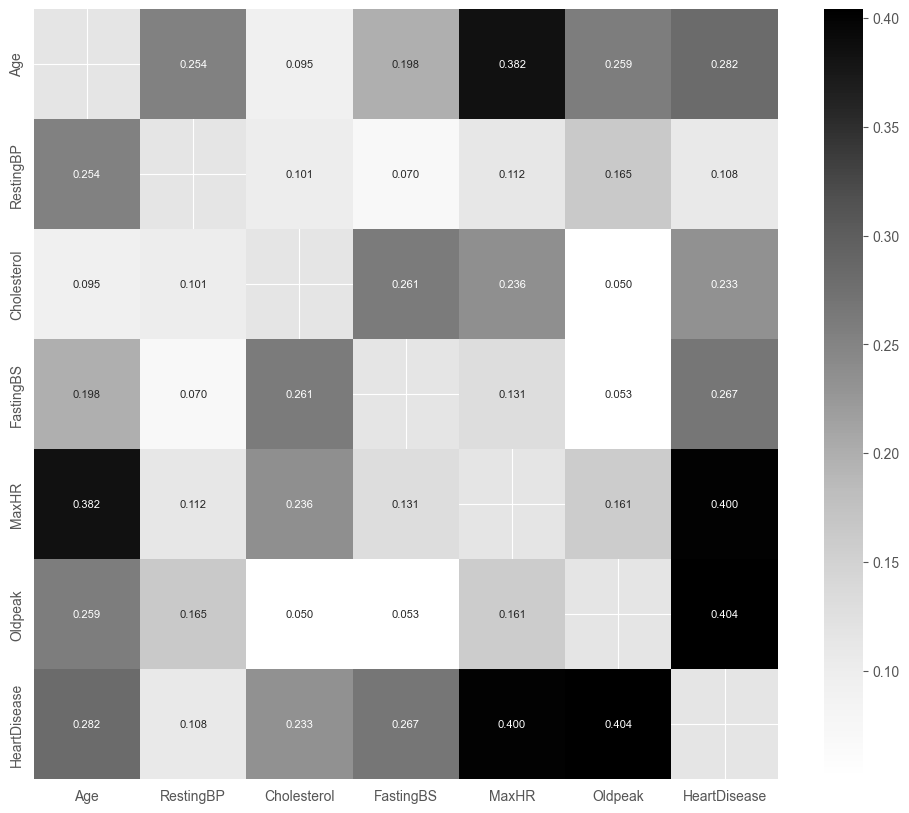

In [258]:
# Select only numeric columns
# Remove categorical features and keep numerical features only for correlation coefficients analysis.
# When creating a correlation coefficients plot, it is generally more meaningful to correlate only the numerical features. Correlation coefficients measure the linear relationship between two continuous variables, so applying them to categorical features does not provide useful information.
numeric_df = df.select_dtypes(include = [float, int])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Set the figure size
plt.figure(figsize = (12, 10))

# Set the diagonal values to NaN
np.fill_diagonal(corr_matrix.values, np.nan)

# Create the heatmap with correlation values annotated and font size set to 10
sns.heatmap(abs(corr_matrix), annot = True, fmt = ".3f", cmap = "Greys", annot_kws = {"size": 8})

# Add the title
# plt.title("\n Correlation Plot of the Heart Failure Prediction \n")

# Display the plot
plt.show()

Heart Disease has a high negative correlation with "MaxHR" and somewhat negative correlation wiht "Cholesterol", where as here positive correatlation with "Oldpeak","FastingBS" and "RestingBP"

In [259]:
# Distribution of Heat Diseases with respect to male and female
import plotly.express as px

# Assuming df is your DataFrame
fig = px.histogram( df, 
                    x = "HeartDisease",
                    color = "Sex",
                    hover_data = df.columns,
                    title = "Distribution of Heart Diseases",
                    barmode = "group",
                    color_discrete_sequence = ["navy", "#EB0A1E"])  # Pastel Rose and Pastel Blue color codes

# Update the layout and margins to set the plot
fig.update_layout(  plot_bgcolor = 'white', width = 800, height = 600,
                    margin = dict(l = 20, r = 20, t = 40, b = 20))  # Adjust margins to make the plot tighter

fig.show()

In [260]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.histogram( df,
                    x = "ChestPainType",
                    color = "Sex",
                    hover_data = df.columns,
                    title = "Types of Chest Pain",
                    color_discrete_sequence = ["navy", "#EB0A1E"])  # Pastel Rose and Pastel Blue color codes

# Update the layout and margins to set the plot
fig.update_layout(  plot_bgcolor = 'white', width = 800, height = 600,
                    margin = dict(l = 20, r = 20, t = 40, b = 20))  # Adjust margins to make the plot tighter

fig.show()

In [261]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.histogram( df,
                    x = "Sex",
                    hover_data = df.columns,
                    title = "Sex Ratio in the Data",
                    color_discrete_sequence = ["navy"])

# Update the layout and margins to set the plot
fig.update_layout(  plot_bgcolor = 'white', width = 800, height = 600,
                    margin = dict(l = 20, r = 20, t = 40, b = 20))  # Adjust margins to make the plot tighter

fig.show()

In [262]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.histogram( df,
                    x = "RestingECG",
                    hover_data = df.columns,
                    title = "Distribution of Resting ECG",
                    color_discrete_sequence = ["navy"])

# Update the layout and margins to set the plot
fig.update_layout(  plot_bgcolor = 'white', width = 800, height = 600,
                    margin = dict(l = 20, r = 20, t = 40, b = 20))  # Adjust margins to make the plot tighter

fig.show()

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

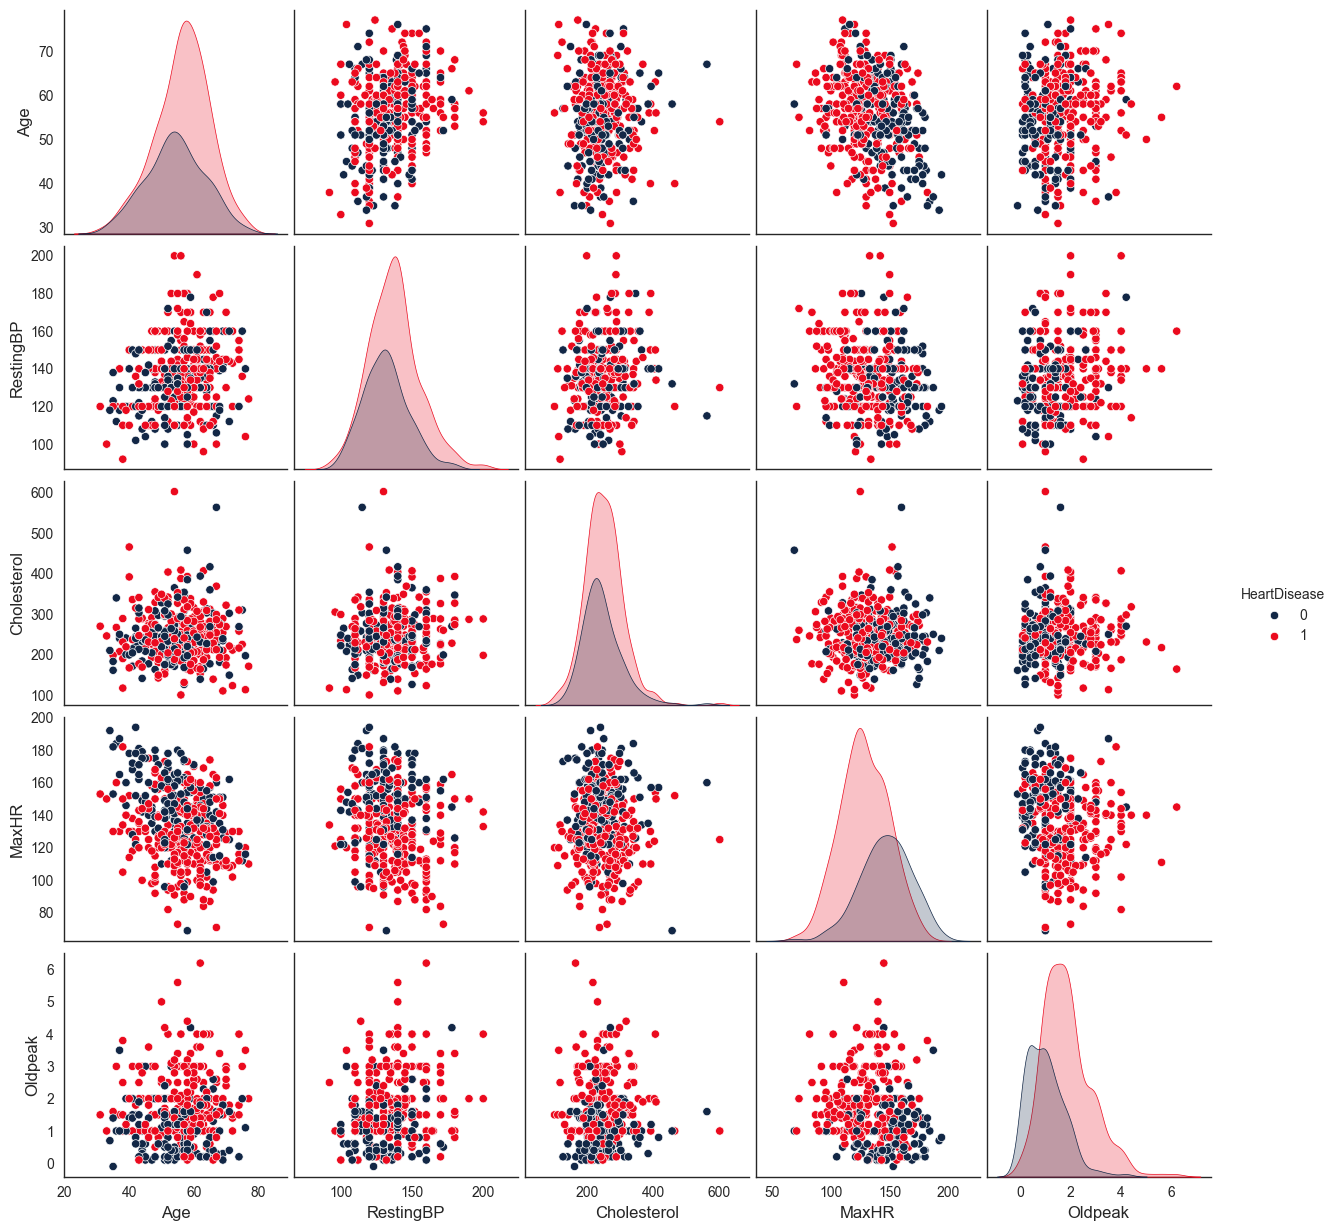

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the background to white
sns.set_style("white")

# Define the color palette
palette = ["#122746", "#EB0A1E"]
# palette = ["navy", "red"]

# plt.figure(figsize = (15, 10))

# Identify binary features, excluding target feature 'HeartDisease'
binary_features = df.columns[(df.nunique() <= 2) | (df.isin([0, 1]).all())]
binary_features = binary_features.drop('HeartDisease')
# Remove binary features from the DataFrame, except 'HeartDisease'
df_filtered = df.drop(columns = binary_features)

# Remove instances where the value is 0 for the remaining numerical features, excluding 'HeartDisease'
null_instances = df_filtered.drop(columns = ['HeartDisease'])
df_filtered = df_filtered[(null_instances != 0).all(axis = 1)]



# Create the pair plot
sns.pairplot(df_filtered, hue = "HeartDisease", palette = palette)

# plt.tight_layout()

plt.show()

# DATA SKEWNESS
To assess the linearity of the variables, it is advisable to plot distribution graphs and examine the skewness of the features. The Kernel Density Estimate (KDE) is a particularly effective tool for visualizing the shape of a distribution.

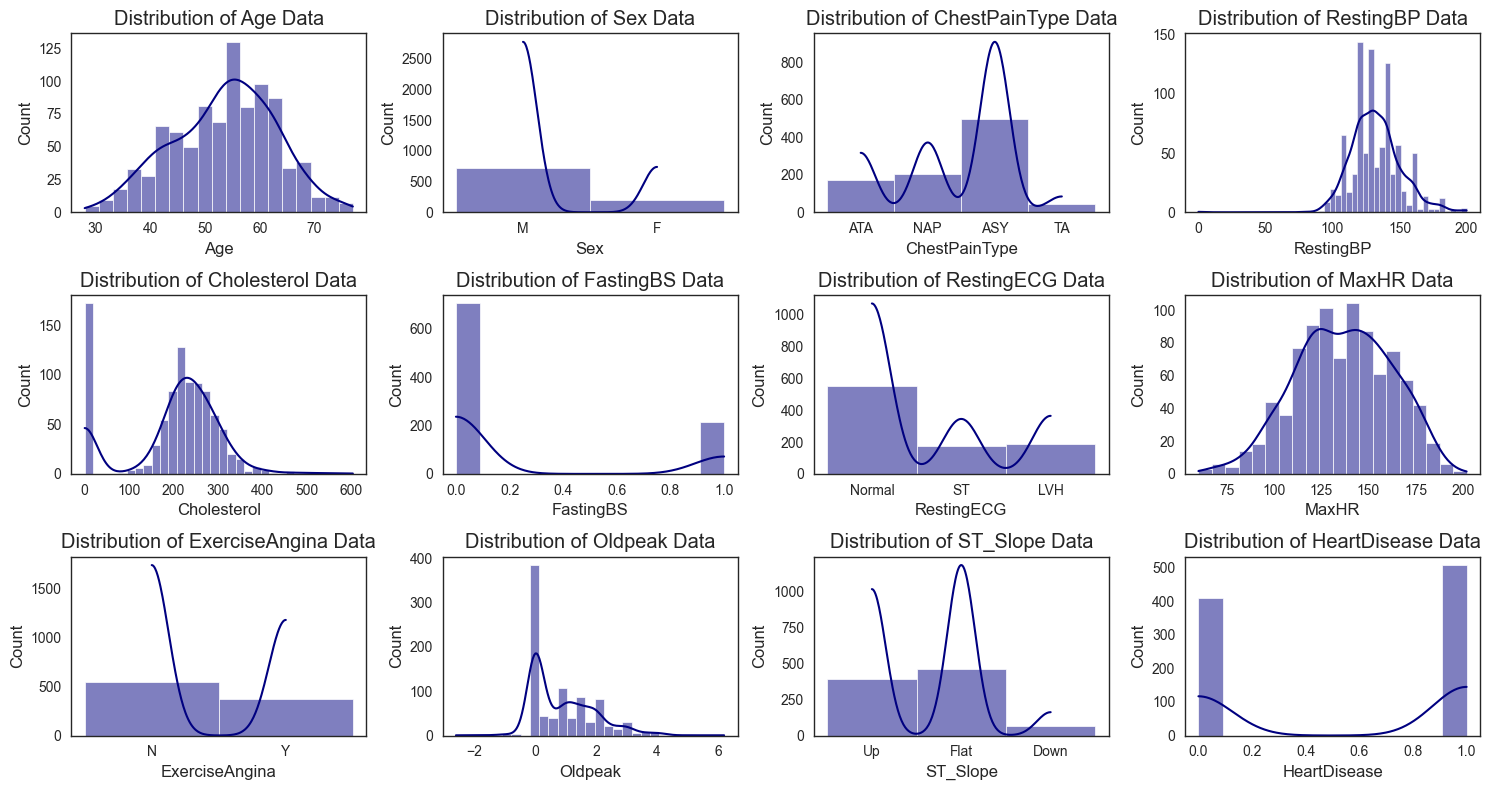

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15, 8))

for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 4, i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col], kde = True, color = 'navy')
    plt.tight_layout()

plt.show()


# DATA - BOXPLOT (OUTLIERS)
A box plot, also known as a box-and-whisker plot, illustrates the distribution of quantitative data, facilitating comparisons between variables. The box represents the quartiles of the dataset, while the whiskers extend to depict the remainder of the distribution. This standardized method of displaying data distribution is based on the five-number summary:
- Minimum
- First quartile
- Median
- Third quartile
- Maximum
In its simplest form, the central rectangle of the box plot spans from the first quartile to the third quartile, representing the interquartile range (IQR). A line within the rectangle indicates the median, and the “whiskers” above and below the box denote the positions of the minimum and maximum values.

In [265]:
# Distribution of Age

import plotly.express as px

# Assuming df is your DataFrame
fig = px.box(   df, 
                y = "Age", 
                x = "HeartDisease", 
                title = "Distribution of Age",
                color_discrete_sequence = ["navy"])  # Set the color to blue

# Update the layout and margins to set the plot
fig.update_layout(  plot_bgcolor = 'white', width = 800, height = 600,
                    margin = dict(l = 20, r = 20, t = 40, b = 20))  # Adjust margins to make the plot tighter

fig.show()

In [266]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.box(   df, 
                y = "RestingBP", 
                x = "HeartDisease", 
                title = "Distribution of RestingBP",
                color = "Sex",
                color_discrete_sequence = ["navy", "#EB0A1E"])  # Pastel Rose and Pastel Blue color codes

# Update the layout and margins to set the plot
fig.update_layout(  plot_bgcolor = 'white', width = 800, height = 600,
                    margin = dict(l = 20, r = 20, t = 40, b = 20))  # Adjust margins to make the plot tighter

fig.show()


In [267]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.box(   df, 
                y = "Cholesterol", 
                x = "HeartDisease", 
                title = "Distribution of Cholesterol",
                color_discrete_sequence = ["navy"])  # 

# Update the layout and margins to set the plot
fig.update_layout(  plot_bgcolor = 'white', width = 800, height = 600,
                    margin = dict(l = 20, r = 20, t = 40, b = 20))  # Adjust margins to make the plot tighter

fig.show()

In [268]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.box(   df, 
                y = "Oldpeak", 
                x = "HeartDisease", 
                title = "Distribution of Oldpeak",
                color_discrete_sequence = ["navy"])  # Set the color to blue

# Update the layout and margins to set the plot
fig.update_layout(  plot_bgcolor = 'white', width = 800, height = 600,
                    margin = dict(l = 20, r = 20, t = 40, b = 20))  # Adjust margins to make the plot tighter

fig.show()

In [269]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.box(   df, 
                y = "MaxHR", 
                x = "HeartDisease", 
                title = "Distribution of MaxHR",
                color_discrete_sequence = ["navy"])  # Set the color to blue

# Update the layout and margins to set the plot
fig.update_layout(  plot_bgcolor = 'white', width = 800, height = 600,
                    margin = dict(l = 20, r = 20, t = 40, b = 20))  # Adjust margins to make the plot tighter

fig.show()

# Data Preprocessing
Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

The concepts that I will cover in this article are
1. Handling Null Values
2. Feature Scaling
3. Handling Categorical Variables

### Handling Null Values:
In python, NULL is reprsented with NaN. So don’t get confused between these two,they can be used interchangably.

In [270]:
# Checking for Type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


In [271]:
# Checking for NULL data in the data set
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Handling Missing Values in Datasets

When dealing with datasets, it is crucial to address the presence of missing values. Simply removing rows or columns with missing values is not always the best approach, as it can lead to significant information loss. In real-world datasets, it is common to encounter a large number of missing values for certain fields. Therefore, instead of discarding these values, it is often more effective to find a way to substitute them.

### Imputation

Imputation is the process of substituting the missing values in a dataset. This can be done by defining a custom function or by using tools such as the SimpleImputer class provided by sklearn. Imputation helps maintain the integrity of the dataset by filling in the gaps, allowing for more accurate analysis and modeling.

# 2. Feature Scaling

The first question we need to address is: why do we need to scale the variables in our dataset? Some machine learning algorithms are sensitive to feature scaling, while others are virtually invariant to it. Let's delve into this in more detail.

### Distance-Based Algorithms

Distance algorithms such as **KNN**, **K-means**, and **SVM** are significantly affected by the range of features. This is because they rely on the distances between data points to determine their similarity. When two features have different scales, there is a risk that features with higher magnitudes will be given more weight. This can negatively impact the performance of the machine learning algorithm, leading to bias towards one feature.

To prevent this, we scale our data before using a distance-based algorithm, ensuring that all features contribute equally to the result.

### Tree-Based Algorithms

Tree-based algorithms, on the other hand, are relatively insensitive to the scale of the features. Consider a decision tree: it splits a node based on a single feature, aiming to increase the homogeneity of the node. This split is not influenced by the scale of other features.

As a result, the remaining features have virtually no effect on the split, making tree-based algorithms invariant to the scale of the features!

### Normalization

Normalization is a technique used to adjust and rescale values so that they fall within the range of 0 to 1. This method is also referred to as Min-Max scaling. In this context, \( X_{\text{max}} \) and \( X_{\text{min}} \) denote the maximum and minimum values of the feature, respectively.

When \( X \) is the minimum value in the column, the numerator becomes 0, resulting in \( X' \) being 0. Conversely, when \( X \) is the maximum value in the column, the numerator equals the denominator, making \( X' \) equal to 1. If \( X \) lies between the minimum and maximum values, then \( X' \) will be between 0 and 1.

### Standardization

Standardization is another scaling technique where values are centered around the mean with a unit standard deviation. This implies that the mean of the attribute becomes zero, and the resultant distribution has a unit standard deviation.

### Question – Normalize or Standardize?

The debate between normalization and standardization is a common one among machine learning practitioners. Here is a detailed explanation:

- **Normalization** is recommended when the distribution of your data does not follow a Gaussian distribution. This can be particularly useful in algorithms that do not assume any distribution of the data, such as K-Nearest Neighbors and Neural Networks.

- **Standardization**, on the other hand, is beneficial when the data follows a Gaussian distribution. However, this is not a strict requirement. Unlike normalization, standardization does not have a bounding range. Therefore, even if outliers are present in your data, they will not be affected by standardization.

Ultimately, the choice between normalization and standardization depends on the specific problem and the machine learning algorithm being used. There is no definitive rule dictating when to normalize or standardize your data.

### Robust Scaler

When dealing with outliers, Robust Scaling can be employed to scale the data. This method scales features using statistics that are robust to outliers. It removes the median and scales the data within the range between the 1st quartile and the 3rd quartile, also known as the Interquartile Range (IQR). The median and the IQR are then stored for future data transformation using the transform method. If outliers are present in the dataset, the median and the IQR provide better results and outperform the sample mean and variance. RobustScaler utilizes the IQR to ensure robustness against outliers.


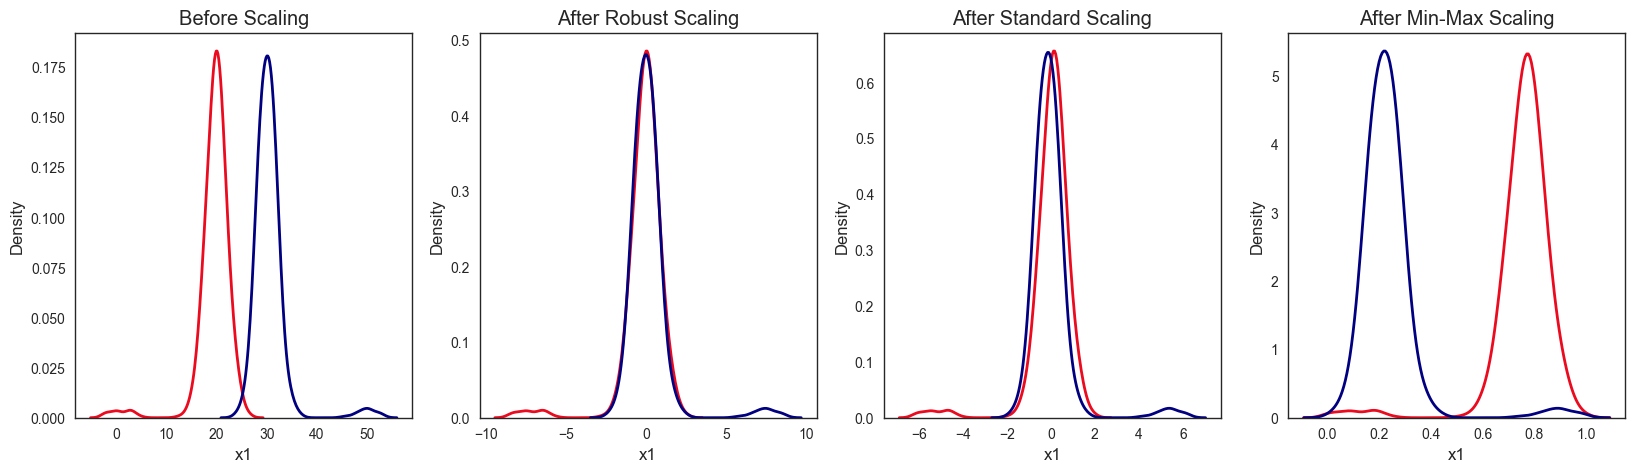

In [272]:
# Data
# ---
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal
 
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])
 
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

# Plots
# ---
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize = (20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(x['x1'], ax = ax1, color = '#EB0A1E', linewidth = 2)
sns.kdeplot(x['x2'], ax = ax1, color = 'navy', linewidth = 2)
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['x1'], ax = ax2, color = '#EB0A1E', linewidth = 2)
sns.kdeplot(robust_df['x2'], ax = ax2, color = 'navy', linewidth = 2)
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['x1'], ax = ax3, color = '#EB0A1E', linewidth = 2)
sns.kdeplot(standard_df['x2'], ax = ax3, color = 'navy', linewidth = 2)
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['x1'], ax = ax4, color = '#EB0A1E', linewidth = 2)
sns.kdeplot(minmax_df['x2'], ax = ax4, color = 'navy', linewidth = 2)

plt.show()

# 3. Handling Categorical Variables

Categorical variables/features are any feature type can be classified into two major types:
- Nominal
- Ordinal

Nominal variables are variables that have two or more categories which do not have any kind of order associated with them. For example, if gender is classified into two groups, i.e. male and female, it can be considered as a nominal variable.Ordinal variables, on the other hand, have “levels” or categories with a particular order associated with them. For example, an ordinal categorical variable can be a feature with three different levels: low, medium and high. Order is important.

It is a binary classification problem:
the target here is **not skewed** but we use the best metric for this binary classification problem which would be Area Under the ROC Curve (AUC). We can use precision and recall too, but AUC combines these two metrics. Thus, we will be using AUC to evaluate the model that we build on this dataset.

We have to know that computers do not understand text data and thus, we need to convert these categories to numbers. A simple way of doing that can be to use :
- Label Encoding
```python
from sklearn.preprocessing import LabelEncoder
```
- One Hot Encoding
```python
pd.get_dummies()
```

but we need to understand where to use which type of label encoding:

**For not Tree based Machine Learning Algorithms the best way to go will be to use One-Hot Encoding**
- One-Hot-Encoding has the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space. 
- The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the curse of dimensionality. In these cases, I typically employ one-hot-encoding followed by PCA for dimensionality reduction. I find that the judicious combination of one-hot plus PCA can seldom be beat by other encoding schemes. PCA finds the linear overlap, so will naturally tend to group similar features into the same feature

**For Tree based Machine Learning Algorithms the best way to go is with Label Encoding**

- LabelEncoder can turn [dog,cat,dog,mouse,cat] into [1,2,1,3,2], but then the imposed ordinality means that the average of dog and mouse is cat. Still there are algorithms like decision trees and random forests that can work with categorical variables just fine and LabelEncoder can be used to store values using less disk space.

In [273]:
df[string_col].head()

for col in string_col:
    print(f"Distribution of categorical values in the {col}: ")
    print(df[col].value_counts())

Distribution of categorical valeus in the Sex: 
Sex
M    725
F    193
Name: count, dtype: Int64
Distribution of categorical valeus in the ChestPainType: 
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: Int64
Distribution of categorical valeus in the RestingECG: 
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: Int64
Distribution of categorical valeus in the ExerciseAngina: 
ExerciseAngina
N    547
Y    371
Name: count, dtype: Int64
Distribution of categorical valeus in the ST_Slope: 
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: Int64


In [274]:
# As we will be using both types of approches for demonstration lets do First Label Ecoding 
# which will be used with Tree Based Algorthms

df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


# Tree-Based Models and Encoding

We can use this directly in many tree-based models:
- Decision trees
- Random forest
- Extra Trees
- Bboosted Trees Models: a) XGBoost; b) GBM; c) LightGBM.

This type of encoding cannot be used in linear models, support vector machines, or neural networks as they expect data to be normalized or standardized. For these types of models, we can binarize the data.

In [275]:
## Creating one hot encoded features for working with non tree based algorithms 

df_nontree = pd.get_dummies(df, columns = string_col, drop_first = False)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [276]:
# Getting the target column at the end

target = "HeartDisease"
y = df_nontree[target].values

df_nontree.drop("HeartDisease", axis = 1, inplace = True)
df_nontree = pd.concat([df_nontree, df[target]],axis = 1)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,False,True,False,True,...,False,False,True,False,True,False,False,False,True,0
1,49,160,180,0,156,1.0,True,False,False,False,...,False,False,True,False,True,False,False,True,False,1
2,37,130,283,0,98,0.0,False,True,False,True,...,False,False,False,True,True,False,False,False,True,0
3,48,138,214,0,108,1.5,True,False,True,False,...,False,False,True,False,False,True,False,True,False,1
4,54,150,195,0,122,0.0,False,True,False,False,...,False,False,True,False,True,False,False,False,True,0


# Cross-Validation Techniques

Choosing the right cross-validation depends on the dataset you are dealing with, and one’s choice of cross-validation on one dataset may or may not apply to other datasets. However, there are a few types of cross-validation techniques which are the most popular and widely used. These include:

- k-fold cross-validation
- stratified k-fold cross-validation

Cross-validation is dividing training data into a few parts. We train the model on some of these parts and test on the remaining parts.

### A. K-fold cross-validation

As you can see, we divide the samples and the targets associated with them. We can divide the data into k different sets which are exclusive of each other. This is known as k-fold cross-validation. We can split any data into k-equal parts using KFold from scikit-learn. Each sample is assigned a value from 0 to k-1 when using k-fold cross-validation.

### B. Stratified k-fold cross-validation

If you have a skewed dataset for binary classification with 90% positive samples and only 10% negative samples, you don't want to use random k-fold cross-validation. Using simple k-fold cross-validation for a dataset like this can result in folds with all negative samples. In these cases, we prefer using stratified k-fold cross-validation. Stratified k-fold cross-validation keeps the ratio of labels in each fold constant. So, in each fold, you will have the same 90% positive and 10% negative samples. Thus, whatever metric you choose to evaluate, it will give similar results across all folds.

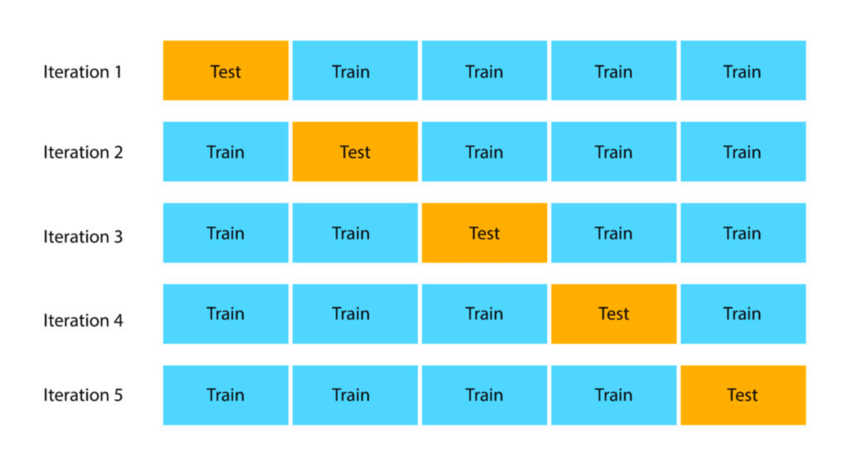

In [277]:
# Number of splits for cross validation
N = 5

# MACHINE LEARNING MODEL TRAINING

# 1. Logistic Regression

**Logistic regression** is a calculation used to predict a binary outcome: either something happens, or does not. This can be exhibited as Yes/No, Pass/Fail, Alive/Dead, etc.

### Working Mode
Independent variables are analyzed to determine the binary outcome with the results falling into one of two categories. The independent variables can be categorical or numeric, but the dependent variable is always categorical. Written like this:

$$ P(Y=1|X) \text{ or } P(Y=0|X) $$

It calculates the probability of dependent variable \( Y \), given independent variable \( X \).

### Applications
This can be used to calculate the probability of a word having a positive or negative connotation (0, 1, or on a scale between). Or it can be used to determine the object contained in a photo (tree, flower, grass, etc.), with each object given a probability between 0 and 1.

### Mathematics of Logistic Regression

### Logistic Function
The logistic function, also known as the sigmoid function, is used to model the probability of a binary outcome. It is defined as:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

Where:
- \( \sigma(z) \) is the logistic function.
- \( z \) is the linear combination of the independent variables.

### Logistic Regression Model
The logistic regression model estimates the probability of the binary outcome as:

$$ P(Y=1|X) = \sigma(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n) $$

Where:
- \( \beta_0 \) is the intercept.
- \( \beta_1, \beta_2, ..., \beta_n \) are the coefficients of the independent variables \( X_1, X_2, ..., X_n \).

### Log-Odds
The log-odds of the probability is given by:

$$ \text{logit}(P) = \ln\left(\frac{P}{1-P}\right) = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n $$

Where:
- \( \text{logit}(P) \) is the log-odds of the probability \( P \).

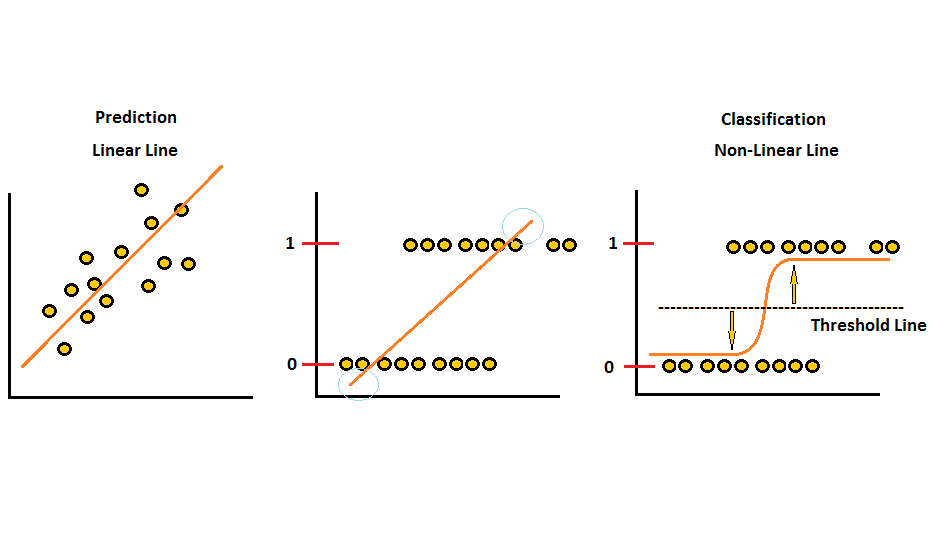

In [278]:
feature_col_nontree = df_nontree.columns.to_list()
feature_col_nontree.remove(target)

In [279]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
acc_log = []

kf = model_selection.StratifiedKFold(n_splits = N)
for fold, (trn_,val_) in enumerate(kf.split(X = df_nontree, y = y)):
    
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = df_nontree.loc[trn_, target]
    
    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = df_nontree.loc[val_, target]
    
    #print(pd.DataFrame(X_valid).head())
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print(f"\n Cross-Validation Fold Number: {fold + 1} \n", 60 * "-")
    print(classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold + 1} : {acc}")
    
    pass


 Cross-Validation Fold Number: 1 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        82
           1       0.93      0.83      0.88       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

The accuracy for Fold 1 : 0.8800813008130083

 Cross-Validation Fold Number: 2 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        82
           1       0.91      0.80      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

The accuracy for Fold 2 : 0.8531802965088474

 Cross-Validation Fold Number: 3 
 --------------------------

# 2. Naive Bayes

A **Naive Bayes** classifier is a probabilistic machine learning algorithm that is used for classification tasks. It is based on Bayes' Theorem and assumes that the features are conditionally independent given the class.

## Working Mode
1. **Bayes' Theorem**: The algorithm uses Bayes' Theorem to calculate the probability of a class given a set of features.
2. **Conditional Independence**: It assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.
3. **Classification**: The classifier assigns the class label with the highest probability to the given set of features.

## Mathematics of Naive Bayes

### Bayes' Theorem
The foundation of Naive Bayes is **Bayes' Theorem**, which describes the probability of an event, based on prior knowledge of conditions that might be related to the event. The theorem is stated as:

$$ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $$

Where:
- \( P(A|B) \) is the posterior probability of class \( A \) given predictor \( B \).
- \( P(B|A) \) is the likelihood which is the probability of predictor \( B \) given class \( A \).
- \( P(A) \) is the prior probability of class \( A \).
- \( P(B) \) is the prior probability of predictor \( B \).

### Naive Assumption
The "naive" assumption in Naive Bayes is that the features are conditionally independent given the class. This simplifies the computation of the posterior probability. For multiple features \( X_1, X_2, ..., X_n \), the formula becomes:

$$ P(A|X_1, X_2, ..., X_n) = \frac{P(A) \cdot P(X_1|A) \cdot P(X_2|A) \cdot ... \cdot P(X_n|A)}{P(X_1) \cdot P(X_2) \cdot ... \cdot P(X_n)} $$

### Classification
To classify a new instance, we calculate the posterior probability for each class and choose the class with the highest probability. Mathematically, this is represented as:

$$ \hat{y} = \underset{c \in C}{\arg\max} \ P(c) \prod_{i=1}^{n} P(x_i|c) $$

Where:
- \( \hat{y} \) is the predicted class.
- \( C \) is the set of all possible classes.
- \( x_i \) are the features of the new instance.

In [280]:
from sklearn.naive_bayes import GaussianNB
acc_Gauss = []
kf = model_selection.StratifiedKFold(n_splits = N)
for fold , (trn_,val_) in enumerate(kf.split(X = df_nontree, y = y)):
    
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = df_nontree.loc[trn_, target]
    
    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = df_nontree.loc[val_, target]
    
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print(f"\n Cross-Validation Fold Number: {fold + 1} \n", 60 * "-")
    print(classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_pred)
    acc_Gauss.append(acc)
    print(f"The accuracy for {fold + 1} : {acc}")
    
    pass


 Cross-Validation Fold Number: 1 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        82
           1       0.93      0.79      0.86       102

    accuracy                           0.85       184
   macro avg       0.86      0.86      0.85       184
weighted avg       0.87      0.85      0.85       184

The accuracy for 1 : 0.8604734576757532

 Cross-Validation Fold Number: 2 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        82
           1       0.93      0.85      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

The accuracy for 2 : 0.8837876614060258

 Cross-Validation Fold Number: 3 
 ------------------------------------

# 3. Support Vector Machines (SVM)

A **Support Vector Machine (SVM)** uses algorithms to train and classify data within degrees of polarity, taking it to a degree beyond X/Y prediction.

### Visual Explanation
For a simple visual explanation, we’ll use two tags: red and blue, with two data features: X and Y, then train our classifier to output an X/Y coordinate as either red or blue.

### How does it work?
The SVM then assigns a hyperplane that best separates the tags. In two dimensions, this is simply a line. Anything on one side of the line is red and anything on the other side is blue. In sentiment analysis, for example, this would be positive and negative.

In order to maximize machine learning, the best hyperplane is the one with the largest distance between each tag.

However, as data sets become more complex, it may not be possible to draw a single line to classify the data into two camps.

Using SVM, the more complex the data, the more accurate the predictor will become. Imagine the above in three dimensions, with a Z-axis added, so it becomes a circle.

Mapped back to two dimensions with the best hyperplane, it looks like this.

### Advantages of SVM
SVM allows for more accurate machine learning because it’s multidimensional.

### Choosing the Best Kernel
We need to choose the best Kernel according to our need:
- **Linear Kernel**: Mostly preferred for text classification problems as it performs well for large datasets.
- **Gaussian Kernel**: Tends to give good results when there is no additional information regarding data that is not available.
- **RBF Kernel**: A kind of Gaussian kernel which projects the high dimensional data and then searches a linear separation for it.
- **Polynomial Kernel**: Gives good results for problems where all the training data is normalized.


In [281]:
# Using Linear Kernel
from sklearn.svm import SVC
acc_svm = []
kf = model_selection.StratifiedKFold(n_splits = N)
for fold , (trn_,val_) in enumerate(kf.split(X = df_nontree, y = y)):
    
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = df_nontree.loc[trn_, target]
    
    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = df_nontree.loc[val_, target]
    
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    clf = SVC(kernel = "linear")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print(f"\n Cross-Validation Fold Number: {fold + 1} \n", 60 * "-")
    print(classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_pred)
    acc_svm.append(acc)
    print(f"The accuracy for {fold + 1} : {acc}")
    
    pass


 Cross-Validation Fold Number: 1 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        82
           1       0.92      0.82      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

The accuracy for 1 : 0.8690817790530847

 Cross-Validation Fold Number: 2 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        82
           1       0.92      0.78      0.85       102

    accuracy                           0.84       184
   macro avg       0.85      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8494739359158296

 Cross-Validation Fold Number: 3 
 ------------------------------------

In [282]:
## Using Sigmoid Kernel
from sklearn.svm import SVC
acc_svm_sig = []
kf = model_selection.StratifiedKFold(n_splits = N)
for fold , (trn_,val_) in enumerate(kf.split(X = df_nontree, y = y)):
    
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = df_nontree.loc[trn_, target]
    
    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = df_nontree.loc[val_, target]
    
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    clf = SVC(kernel = "sigmoid")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print(f"\n Cross-Validation Fold Number: {fold + 1} \n", 60 * "-")
    print(classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_pred)
    acc_svm_sig.append(acc)
    print(f"The accuracy for {fold + 1} : {acc}")
    
    pass


 Cross-Validation Fold Number: 1 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        82
           1       0.87      0.86      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

The accuracy for 1 : 0.852104256336681

 Cross-Validation Fold Number: 2 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        82
           1       0.80      0.75      0.77       102

    accuracy                           0.76       184
   macro avg       0.75      0.76      0.75       184
weighted avg       0.76      0.76      0.76       184

The accuracy for 2 : 0.7566953610712578

 Cross-Validation Fold Number: 3 
 -------------------------------------

In [283]:
## Using RBF kernel
from sklearn.svm import SVC
acc_svm_rbf = []
kf = model_selection.StratifiedKFold(n_splits = N)
for fold , (trn_,val_) in enumerate(kf.split(X = df_nontree, y = y)):
    
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = df_nontree.loc[trn_, target]
    
    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = df_nontree.loc[val_, target]
    
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    clf = SVC(kernel = "rbf")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print(f"\n Cross-Validation Fold Number: {fold + 1} \n", 60 * "-")
    print(classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_pred)
    acc_svm_rbf.append(acc)
    print(f"The accuracy for {fold + 1} : {acc}")
    
    pass


 Cross-Validation Fold Number: 1 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        82
           1       0.91      0.93      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184

The accuracy for 1 : 0.9108082257293162

 Cross-Validation Fold Number: 2 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        82
           1       0.91      0.78      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8433763749402199

 Cross-Validation Fold Number: 3 
 ------------------------------------

In [284]:
## Using RBF kernel
from sklearn.svm import SVC
acc_svm_poly = []
kf = model_selection.StratifiedKFold(n_splits = N)
for fold , (trn_,val_) in enumerate(kf.split(X = df_nontree,y=y)):
    
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = df_nontree.loc[trn_, target]
    
    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = df_nontree.loc[val_, target]
    
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    clf = SVC(kernel = "poly")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print(f"\n Cross-Validation Fold Number: {fold + 1} \n", 60 * "-")
    print(classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_pred)
    acc_svm_poly.append(acc)
    print(f"The accuracy for {fold + 1} : {acc}")
    
    pass


 Cross-Validation Fold Number: 1 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        82
           1       0.92      0.89      0.91       102

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

The accuracy for 1 : 0.897297943567671

 Cross-Validation Fold Number: 2 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        82
           1       0.91      0.78      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8433763749402199

 Cross-Validation Fold Number: 3 
 -------------------------------------

# 4. K-Nearest Neighbors (KNN)
The optimal value of \( k \) is typically found to be the square root of \( N \), where \( N \) represents the total number of samples.

K-nearest neighbors (k-NN) is a pattern recognition algorithm that leverages training datasets to identify the \( k \) closest relatives in future examples.

### Key Features of K-Nearest Neighbors

1. **Classification and Regression**: k-NN can be used for both classification and regression tasks. In classification, it assigns a class to a data point based on the majority class of its nearest neighbors. In regression, it predicts a continuous value based on the average of the values of its nearest neighbors.

2. **Instance-Based Learning**: k-NN is an instance-based learning algorithm, meaning it does not explicitly learn a model. Instead, it memorizes the training data and makes predictions based on the similarity between the new data points and the stored instances.

3. **Distance Metrics**: The algorithm relies on distance metrics to determine the similarity between data points. Commonly used distance metrics include Euclidean distance, Manhattan distance, and Minkowski distance.

### How K-Nearest Neighbors Works

When k-NN is used in classification, the algorithm calculates the distance between the new data point and all the training data points. It then identifies the \( k \) nearest neighbors and assigns the new data point to the class that is most common among these neighbors. If \( k = 1 \), the data point is assigned to the class of its single nearest neighbor. The value of \( k \) is determined by a plurality poll of its neighbors.

### Advantages of K-Nearest Neighbors

- **Simplicity**: k-NN is simple to understand and implement, making it accessible to beginners in machine learning.
- **No Training Phase**: Since k-NN is an instance-based algorithm, it does not require a training phase, which can save computational resources.
- **Versatility**: k-NN can handle both classification and regression tasks, making it a versatile algorithm.

### Disadvantages of K-Nearest Neighbors

- **Computational Complexity**: k-NN can be computationally expensive, especially with large datasets, as it requires calculating the distance between the new data point and all training data points.
- **Sensitivity to Irrelevant Features**: The algorithm's performance can be affected by irrelevant features, as they can distort the distance calculations.
- **Choice of \( k \)**: Selecting the optimal value of \( k \) can be challenging and may require cross-validation.

### Applications of K-Nearest Neighbors

k-NN is widely used in various domains due to its simplicity and effectiveness. Some common applications include:

- **Image Recognition**: k-NN is used to classify images based on their pixel values and features.
- **Recommendation Systems**: k-NN helps in recommending products or services based on user preferences and similarities.
- **Anomaly Detection**: k-NN is employed to detect anomalies or outliers in datasets by identifying data points that are significantly different from their neighbors.

Overall, k-NN is a powerful and intuitive algorithm that excels in a wide range of pattern recognition tasks. Its ability to make predictions based on the similarity between data points makes it a valuable tool in the field of machine learning.

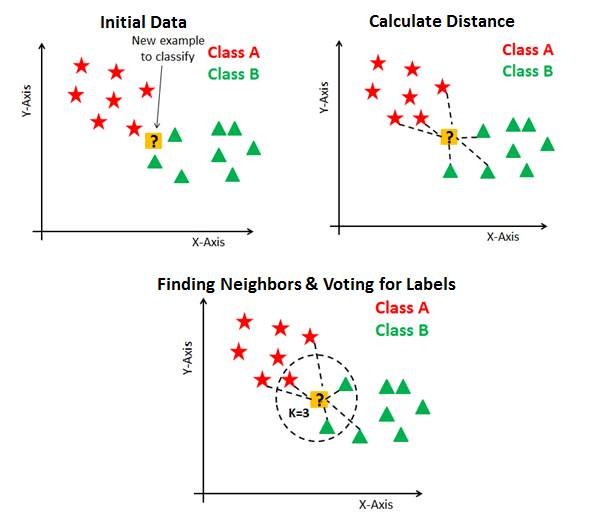

In [285]:
## Using RBF kernel
from sklearn.neighbors import KNeighborsClassifier
acc_KNN = []
kf = model_selection.StratifiedKFold(n_splits = N)
for fold , (trn_,val_) in enumerate(kf.split(X = df_nontree, y = y)):
    
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = df_nontree.loc[trn_, target]
    
    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = df_nontree.loc[val_, target]
    
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    clf = KNeighborsClassifier(n_neighbors = 32)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print(f"\n Cross-Validation Fold Number: {fold + 1} \n", 60 * "-")
    print(classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_pred)
    acc_KNN.append(acc)
    print(f"The accuracy for {fold + 1} : {acc}")
    
    pass


 Cross-Validation Fold Number: 1 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        82
           1       0.93      0.93      0.93       102

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184

The accuracy for 1 : 0.9230033476805357

 Cross-Validation Fold Number: 2 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        82
           1       0.91      0.79      0.85       102

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8482783357245336

 Cross-Validation Fold Number: 3 
 ------------------------------------

# 5. TREE BASED ALGORITHM
### Decision Tree Classifier

A decision tree is a supervised learning algorithm that is particularly well-suited for classification problems, as it can precisely order classes. It operates in a manner similar to a flow chart, dividing data points into two similar categories at each step, progressing from the "tree trunk" to "branches," and finally to "leaves," where the categories become more finely distinguished. This hierarchical structure allows for the creation of nested categories, facilitating organic classification with minimal human intervention.

### Key Features of Decision Tree Classifier

1. **Hierarchical Structure**: The decision tree's hierarchical structure enables it to handle complex classification tasks by breaking them down into simpler decisions at each node.

2. **Interpretability**: Decision trees are highly interpretable, as the decision-making process can be easily visualized and understood. Each node represents a decision based on a specific feature, and the path from the root to a leaf node represents a classification rule.

3. **Non-Parametric Nature**: Decision trees are non-parametric, meaning they do not make any assumptions about the underlying data distribution. This makes them versatile and applicable to a wide range of classification problems.

4. **Handling of Non-Linear Relationships**: Decision trees can capture non-linear relationships between features and the target variable, making them effective for complex datasets.

5. **Feature Importance**: Decision trees provide insights into feature importance by indicating which features are most influential in the classification process. This can be useful for feature selection and understanding the data.

### Advantages of Decision Tree Classifier

- **Simplicity**: Decision trees are simple to understand and interpret, making them accessible to non-experts.
- **Versatility**: They can handle both numerical and categorical data, making them suitable for various types of classification tasks.
- **Robustness to Outliers**: Decision trees are relatively robust to outliers, as the splitting criteria focus on the majority of the data points.

### Disadvantages of Decision Tree Classifier

- **Overfitting**: Decision trees are prone to overfitting, especially when the tree is deep and complex. This can be mitigated through techniques such as pruning and setting a maximum depth.
- **Instability**: Small changes in the data can lead to significant changes in the structure of the tree, making them sensitive to variations in the dataset.

### Applications of Decision Tree Classifier

Decision tree classifiers are widely used in various domains due to their interpretability and effectiveness. Some common applications include:

- **Medical Diagnosis**: Decision trees are used to classify medical conditions based on patient symptoms and test results.
- **Customer Segmentation**: Businesses use decision trees to segment customers based on purchasing behavior and demographic information.
- **Fraud Detection**: Decision trees help identify fraudulent transactions by analyzing patterns in transaction data.

Overall, decision tree classifiers are powerful tools for classification tasks, offering a balance between simplicity, interpretability, and effectiveness.

In [286]:
feature_col_tree = df_tree.columns.to_list()
feature_col_tree.remove(target)
feature_col_tree

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope']

In [287]:
from sklearn.tree import DecisionTreeClassifier
acc_Dtree = []
kf = model_selection.StratifiedKFold(n_splits = N)
for fold , (trn_,val_) in enumerate(kf.split(X = df_tree, y = y)):
    
    X_train = df_tree.loc[trn_, feature_col_tree]
    y_train = df_tree.loc[trn_, target]
    
    X_valid = df_tree.loc[val_, feature_col_tree]
    y_valid = df_tree.loc[val_, target]
    
    clf = DecisionTreeClassifier(criterion = "entropy")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print(f"\n Cross-Validation Fold Number: {fold + 1} \n", 60 * "-")
    print(classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_pred)
    acc_Dtree.append(acc)
    print(f"The accuracy for {fold + 1} : {acc}")


 Cross-Validation Fold Number: 1 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.87      0.74        82
           1       0.85      0.62      0.72       102

    accuracy                           0.73       184
   macro avg       0.75      0.74      0.73       184
weighted avg       0.76      0.73      0.73       184

The accuracy for 1 : 0.7417503586800573

 Cross-Validation Fold Number: 2 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.88      0.77        82
           1       0.87      0.68      0.76       102

    accuracy                           0.77       184
   macro avg       0.78      0.78      0.77       184
weighted avg       0.79      0.77      0.77       184

The accuracy for 2 : 0.7772596843615496

 Cross-Validation Fold Number: 3 
 ------------------------------------

In [288]:
'''

# pip install graphviz

import graphviz
from sklearn import tree
# target = ['HeartDisease']
# feature_col_tree = df_tree.columns.to_list()
# feature_col_tree.remove('HeartDisease')
# target = ['0', '1']

# DOT data
dot_data = tree.export_graphviz(    clf, out_file = None, 
                                    feature_names = feature_col_tree,  
                                    class_names = target,
                                    filled = True)

# Draw graph
graph = graphviz.Source(dot_data, format = "png") 
graph

'''

'\n\n# pip install graphviz\n\nimport graphviz\nfrom sklearn import tree\n# target = [\'HeartDisease\']\n# feature_col_tree = df_tree.columns.to_list()\n# feature_col_tree.remove(\'HeartDisease\')\n# target = [\'0\', \'1\']\n\n# DOT data\ndot_data = tree.export_graphviz(    clf, out_file = None, \n                                    feature_names = feature_col_tree,  \n                                    class_names = target,\n                                    filled = True)\n\n# Draw graph\ngraph = graphviz.Source(dot_data, format = "png") \ngraph\n\n'

In [289]:
feature_col_tree

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope']

In [290]:
target = ["HeartDisease"]

# 6. Random Forest Classifier

A **Random Forest Classifier** is a powerful and versatile machine learning algorithm that is used for both classification and regression tasks.
It is an ensemble learning method that combines the predictions of multiple decision trees to produce a more accurate and stable result.

### Working Mode
1. **Data Sampling**: The algorithm creates multiple subsets of the original dataset by randomly selecting data points with replacement (this is known as bootstrapping).
2. **Decision Trees**: For each subset, a decision tree is built. Each tree is trained on a different subset of the data, and at each node, a random subset of features is considered for splitting.
3. **Voting**: For classification tasks, each tree in the forest gives a classification (a "vote"), and the forest chooses the classification with the majority of the votes. For regression tasks, the average of the outputs from all the trees is taken.

### Advantages
- **Accuracy**: By combining multiple trees, the Random Forest reduces the risk of overfitting and improves predictive accuracy.
- **Robustness**: It is less sensitive to noisy data and outliers.
- **Versatility**: It can handle both classification and regression problems.

### Disadvantages
- **Complexity**: The model can be computationally intensive and require more memory.
- **Interpretability**: It can be harder to interpret compared to a single decision tree.

<!-- 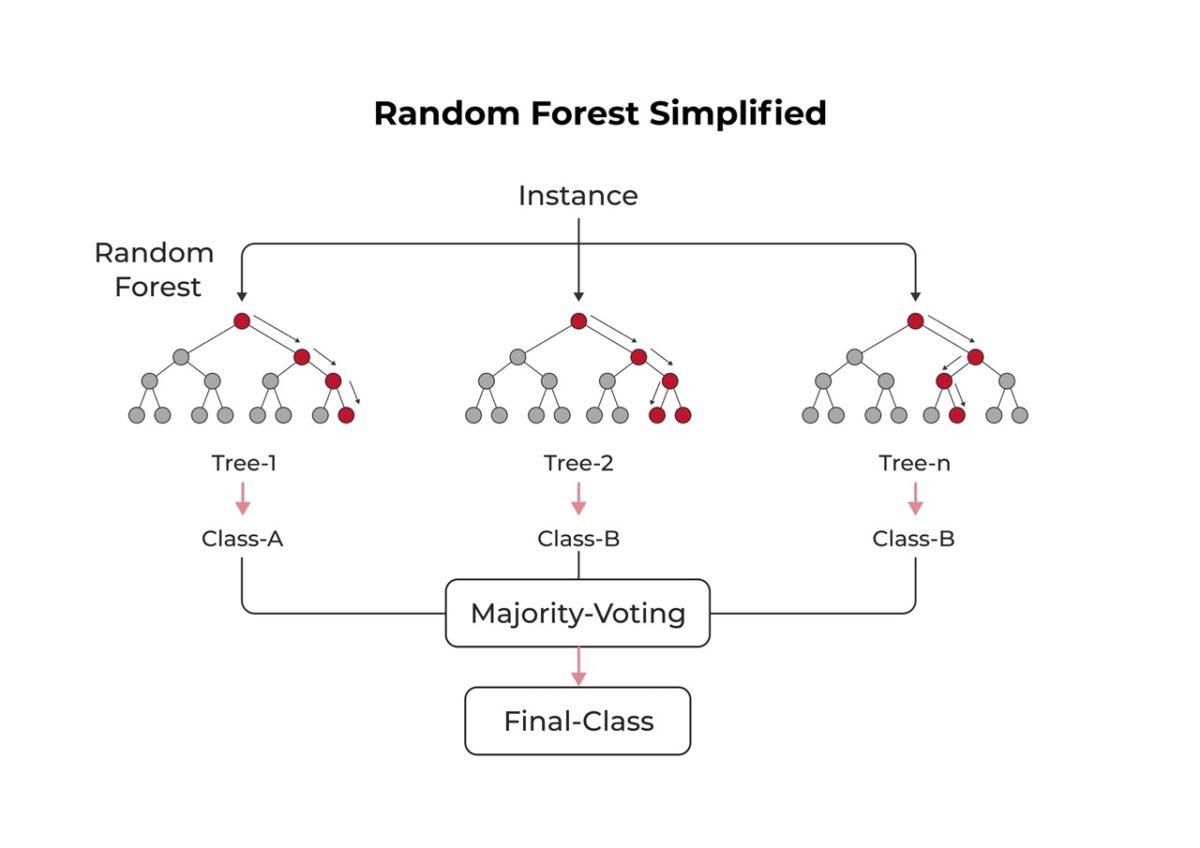 -->

### The Principle of Random Forest

The core principle underlying the random forest algorithm is both straightforward and potent: the collective intelligence of multiple models. In the realm of data science, the success of the random forest model can be explained by the following assertion:

**A substantial number of relatively uncorrelated models (trees) functioning as a collective will surpass the performance of any single constituent model.**

The critical factor in this assertion is the low correlation among the models. Analogous to how investments with low correlations (such as stocks and bonds) combine to create a portfolio that exceeds the sum of its individual components, uncorrelated models can generate ensemble predictions that are more precise than any single prediction.

This exceptional phenomenon occurs because the trees within the forest safeguard each other from their individual inaccuracies, provided they do not consistently err in the same manner. While some trees may produce erroneous predictions, numerous other trees will yield accurate predictions. Consequently, as a collective, the trees are capable of progressing in the correct direction.


In [291]:
from sklearn.ensemble import RandomForestClassifier
acc_RandF = []
kf = model_selection.StratifiedKFold(n_splits = N)
for fold , (trn_,val_) in enumerate(kf.split(X = df_tree, y = y)):
    
    X_train = df_tree.loc[trn_, feature_col_tree]
    y_train = df_tree.loc[trn_, target]
    
    X_valid = df_tree.loc[val_, feature_col_tree]
    y_valid = df_tree.loc[val_, target]
    
    clf = RandomForestClassifier(n_estimators = 200, criterion = "entropy")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print(f"\n Cross-Validation Fold Number: {fold + 1} \n", 60 * "-")
    print(classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_pred)
    acc_RandF.append(acc)
    print(f"The accuracy for {fold + 1} : {acc}")


 Cross-Validation Fold Number: 1 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.94      0.87        82
           1       0.94      0.81      0.87       102

    accuracy                           0.87       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.87      0.87       184

The accuracy for 1 : 0.8763749402199904

 Cross-Validation Fold Number: 2 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        82
           1       0.91      0.80      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

The accuracy for 2 : 0.8531802965088474

 Cross-Validation Fold Number: 3 
 ------------------------------------

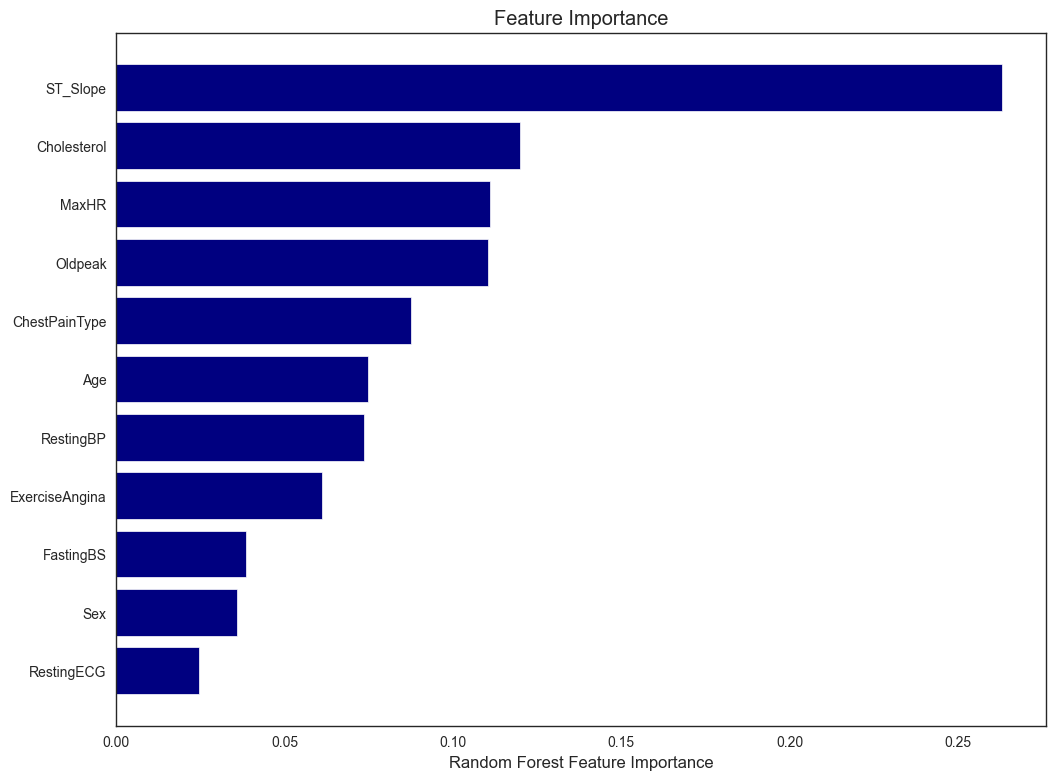

In [292]:
## Checking Feature importance 
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (12, 9))
importance = clf.feature_importances_
idxs = np.argsort(importance)

plt.title("Feature Importance")
plt.barh(range(len(idxs)), importance[idxs], color = 'navy', align = 'center')
plt.yticks(range(len(idxs)),[feature_col_tree[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")

#plt.tight_layout()
plt.show()

### XGBoost

In contrast to many other algorithms, XGBoost is an ensemble learning algorithm, which implies that it amalgamates the outcomes of multiple models, referred to as base learners, to generate a prediction.

Similar to Random Forests, XGBoost employs Decision Trees as its base learners:

However, the trees utilized by XGBoost differ from traditional decision trees. These trees are known as CART trees (Classification and Regression Trees). Instead of containing a single decision in each "leaf" node, they encompass real-value scores indicating whether an instance belongs to a particular group. Once the tree reaches its maximum depth, the decision can be made by converting these scores into categories using a specified threshold.

### Key Features of XGBoost

- **Gradient Boosting**: XGBoost is based on the gradient boosting framework, which builds models sequentially. Each new model attempts to correct the errors made by the previous models, thereby improving the overall performance.

- **Regularization**: XGBoost includes regularization parameters to prevent overfitting. This ensures that the model generalizes well to new, unseen data.

- **Parallel Processing**: XGBoost supports parallel processing, which allows it to utilize multiple CPU cores for training. This significantly speeds up the training process.

- **Handling Missing Values**: XGBoost has a built-in mechanism to handle missing values. It learns the best way to handle missing data during training, making it robust to incomplete datasets.

- **Tree Pruning**: XGBoost uses a technique called tree pruning to remove branches that do not contribute significantly to the model's performance. This helps in reducing the complexity of the model and improving its interpretability.

- **Cross-Validation**: XGBoost supports cross-validation, which allows for better model evaluation and hyperparameter tuning. This ensures that the model is well-optimized and performs well on different datasets.

### Applications of XGBoost

XGBoost is widely used in various domains due to its high performance and flexibility. Some common applications include:

- **Classification**: XGBoost is used for binary and multi-class classification tasks, such as spam detection, image recognition, and disease diagnosis.
- **Regression**: XGBoost is employed for regression tasks, such as predicting house prices, stock market trends, and sales forecasting.
- **Ranking**: XGBoost is used in ranking tasks, such as search engine ranking, recommendation systems, and information retrieval.

Overall, XGBoost is a powerful and versatile algorithm that excels in a wide range of machine learning tasks. Its ability to handle large datasets, provide accurate predictions, and offer interpretability makes it a popular choice among data scientists and machine learning practitioners.


In [293]:
from xgboost import XGBClassifier
acc_XGB = []
kf = model_selection.StratifiedKFold(n_splits = N)
for fold, (trn_,val_) in enumerate(kf.split(X = df_tree, y = y)):
    
    X_train = df_tree.loc[trn_, feature_col_tree]
    y_train = df_tree.loc[trn_, target]
    
    X_valid = df_tree.loc[val_, feature_col_tree]
    y_valid = df_tree.loc[val_, target]
    
    clf = XGBClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_pred)
    acc_XGB.append(acc)
    print(f"The accuracy for {fold + 1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.83      0.93      0.87        82
           1       0.93      0.84      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.88      0.88       184

The accuracy for 1 : 0.884983261597322
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        82
           1       0.92      0.78      0.85       102

    accuracy                           0.84       184
   macro avg       0.85      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8494739359158296
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.61      0.75        82
           1       0.76      0.98      0.85       102

    accuracy                           0.82   

In [294]:
'''

# !pip install graphviz

fig, ax = plt.subplots(figsize = (10, 10))
from xgboost import plot_tree
plot_tree(clf, num_trees = 0, rankdir = "LR", ax = ax)
plt.show()

'''

'\n\n# !pip install graphviz\n\nfig, ax = plt.subplots(figsize = (10, 10))\nfrom xgboost import plot_tree\nplot_tree(clf, num_trees = 0, rankdir = "LR", ax = ax)\nplt.show()\n\n'

In [295]:
!pip show graphviz

!python -m site

Name: graphviz
Version: 0.20.3
Summary: Simple Python interface for Graphviz
Home-page: https://github.com/xflr6/graphviz
Author: Sebastian Bank
Author-email: sebastian.bank@uni-leipzig.de
License: MIT
Location: C:\Users\feder\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: 
Required-by: 
sys.path = [
    'c:\\Users\\feder\\Documents\\Profession & Work\\Coursera\\IBM - MACHINE LEARNING\\6. Machine Learning Capstone\\ML project - Heart',
    'c:\\Users\\feder\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip',
    'c:\\Users\\feder\\AppData\\Local\\Programs\\Python\\Python312\\DLLs',
    'c:\\Users\\feder\\AppData\\Local\\Programs\\Python\\Python312\\Lib',
    'c:\\Users\\feder\\AppData\\Local\\Programs\\Python\\Python312',
    'C:\\Users\\feder\\AppData\\Roaming\\Python\\Python312\\site-packages',
    'C:\\Users\\feder\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32',
    'C:\\Users\\feder\\AppData\\Roaming\\Python\\Python312\\site-packages\\win

### Choosing the Best Evaluation Metric

When addressing classification problems, the most commonly used metrics are as follows:
- **Accuracy**
- **Precision (P)**
- **Recall (R)**
- **F1 Score (F1)**
- **Area Under the ROC (Receiver Operating Characteristic) Curve (AUC)**:
Calculating the area under the ROC curve provides another frequently used metric, particularly when dealing with datasets that have skewed binary targets. This metric is known as the Area Under the ROC Curve, Area Under Curve, or simply AUC. There are various methods to calculate the area under the ROC curve.
AUC is a widely recognized metric for skewed binary classification tasks in the industry and is essential knowledge for practitioners.

- **Log Loss**
<!-- Log Loss = -1.0 * (target * log(prediction) + (1 - target) * log(1 - prediction)) -->
$$
\text{log loss} = -1.0 \times \left[( \text{target} \times \log(\text{prediction}) + (1 - \text{target}) \times \log(1 - \text{prediction}) \right]
$$


Most of the metrics discussed thus far can be adapted to a multi-class version. The concept is straightforward. For instance, precision and recall can be calculated for each class in a multi-class classification problem.

- **Macro-Averaged Precision**: Calculate precision for all classes individually and then average them.
- **Micro-Averaged Precision**: Calculate class-wise true positives and false positives, and then use these to calculate overall precision.
- **Weighted Precision**: Similar to macro-averaged precision, but in this case, it is a weighted average based on the number of items in each class.


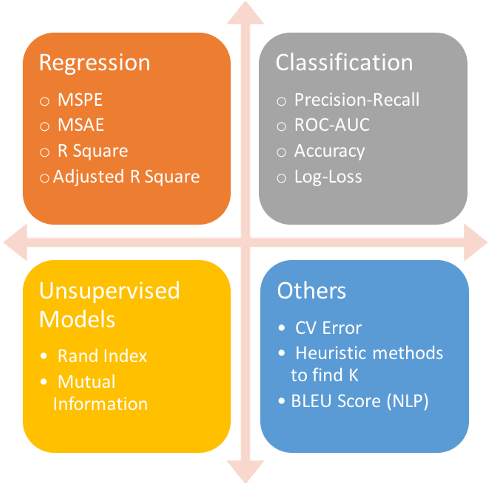